# Perceptron (Regresión logística)

## Preprocesamiento

### Librerias y archivos necesarios

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Comando para subir archivos
files.upload()

Saving diabetes.csv to diabetes (1).csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

### Acomodando los datos

In [ ]:
# Leyendo los datos separados por comas y convirtiendo en numpy
df = pd.read_csv('diabetes.csv')
data= df.to_numpy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Se dividen los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split

X = df.drop('Outcome' , axis = 1)
Y = df['Outcome']


X_ent, X_val, Y_ent, Y_val = train_test_split(X, Y, test_size =0.1, random_state=0)

## Generando el modelo con Tensorflow

In [ ]:
#Entrada: Capa Input con el número de características de los datos
#Salidas: Capa Totalmente conectada (Dense) con el número de neuronas
#         igual a la cantidad de salidas que deseamos

input_dt= tf.keras.layers.Input(shape= (8))
x= tf.keras.layers.Dense(8, 'relu')(input_dt)
x= tf.keras.layers.Dense(16, 'relu')(x)
x= tf.keras.layers.Dense(16, 'relu')(x)
salida= tf.keras.layers.Dense(1, 'sigmoid')(x)

# Defininmos el modelo con la capa de entrada y salida
model= tf.keras.Model(inputs= input_dt, outputs= salida)

# Resumimos el modelo para verificar que sea la arquitectura deseada
model.summary()


# Compilación del modelo;
#   Optimizador: Adam
#   Loss: Binary crossentropy
#   Epocas: Número de veces que se va a entrenar el modelo

model.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'binary_crossentropy', metrics= ['accuracy'])
history= model.fit(X_ent, Y_ent, validation_data= [X_val, Y_val], epochs= 1000)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dense_25 (Dense)            (None, 16)                144       
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
22/22 [==============================] - 1s 16ms

### Revisando el entrenamiento

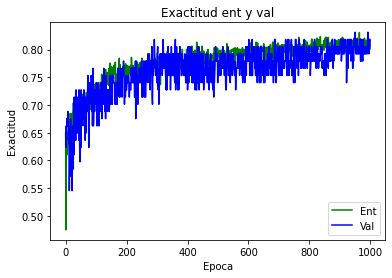

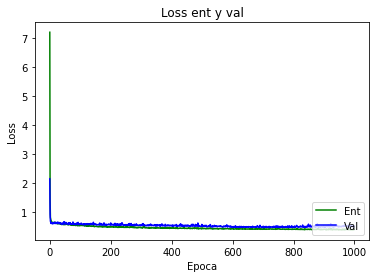

In [ ]:
acc= history.history['accuracy']
loss= history.history['loss']
acc_val= history.history['val_accuracy']
loss_val= history.history['val_loss']

def graficar(val_1, val_2, titulo, ylabel):
  epochs= np.arange(len(history.history['accuracy']))
  plt.plot(epochs, val_1, 'g', label= 'Ent')
  plt.plot(epochs, val_2, 'b', label= 'Val')
  plt.xlabel('Epoca')
  plt.ylabel(ylabel)
  plt.title(titulo)
  plt.legend(loc='lower right')
  plt.show()

graficar(acc, acc_val, 'Exactitud ent y val', 'Exactitud')
graficar(loss, loss_val, 'Loss ent y val', 'Loss')